Each sample in the train and test set has the following information:

- The text of a tweet
- A keyword from that tweet (although this may be blank!)
- The location the tweet was sent from (may also be blank)

We are predicting whether a given tweet is about a real disaster or not. If so, predict a 1. If not, predict a 0.


More details about the competition here:
https://www.kaggle.com/c/nlp-getting-started

In [1]:
from IPython.core.debugger import set_trace

%load_ext nb_black

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time

plt.style.use(style="seaborn")
%matplotlib inline

<IPython.core.display.Javascript object>

In [2]:
# Import movies dataframe
movies = pd.read_csv(
    "https://data-bootcamp-ztc.s3.amazonaws.com/movies_complete_cleaned.csv"
)

awards = pd.read_csv(
    "https://data-bootcamp-ztc.s3.amazonaws.com/parsed_awards_table.csv"
)

<IPython.core.display.Javascript object>

In [8]:
movies_sel = movies[["name", "plot"]]

awards_sel = awards[["name", "oscar wins and nominations"]]

awards_sel["target"] = [
    1 if x != 0 else 0 for x in awards_sel["oscar wins and nominations"]
]

data = pd.merge(movies_sel, awards_sel, how="left", on="name")

data.set_index("name", inplace=True)

data.drop(["oscar wins and nominations"], axis=1, inplace=True)

data = df.dropna(axis="index", subset=["plot"])

data.head()

/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,plot,target
name,,
Doctor Strange,"Marvel's ""Doctor Strange"" follows the story of...",1
Sleight,A young street magician (Jacob Latimore) is le...,0
Silence,The story of two Catholic missionaries (Andrew...,1
Manchester by the Sea,"Lee Chandler is a brooding, irritable loner wh...",1
Dirty Grandpa,"Jason Kelly, the grandson of Dick Kelly, loses...",0


<IPython.core.display.Javascript object>

In [29]:
def create_corpus(df, target):
    """
    Create corpus based on the target.
    """
    corpus = []
    

    for x in df[df["target"] == target]["plot"].str.split():
        for i in x:
            corpus.append(i)
    return corpus

<IPython.core.display.Javascript object>

In [51]:
data[data["target"] == 0]["plot"].str.split()

name
Sleight                        [young, street, magician, jacob, latimore, lef...
Dirty Grandpa                  [jason, kelly, grandson, dick, kelly, loses, g...
Hunt for the Wilderpeople      [national, manhunt, ordered, rebellious, kid, ...
Lady Macbeth                   [rural, england, 1865, katherine, stifled, lov...
Don't Breathe                  [rocky, young, woman, wanting, start, better, ...
                                                     ...                        
Half Moon Street               [dr, lauren, slaughter, research, fellow, arab...
Off Beat                          [traumatised, paramedic, looks, woman, dreams]
Big Trouble in Little China    [truck, driver, jack, burton, arrives, chinato...
Biggles: Adventures in Time    [one, minute, new, yorker, advertising, expert...
Soul Man                       [mark, doesnt, expect, problems, going, colleg...
Name: plot, Length: 5001, dtype: object

<IPython.core.display.Javascript object>

Find stopwords in disaster text corpus 

In [30]:
from nltk.corpus import stopwords

stop = set(stopwords.words("english"))

<IPython.core.display.Javascript object>

In [31]:
from collections import defaultdict

<IPython.core.display.Javascript object>

In [32]:
corpus0 = create_corpus(df=data, target=0)
corpus1 = create_corpus(df=data, target=1)

d0 = defaultdict(int)
for word in corpus0:
    if word in stop:
        d0[word] += 1

d1 = defaultdict(int)
for word in corpus1:
    if word in stop:
        d1[word] += 1

<IPython.core.display.Javascript object>

Let's look at the punctuation in the corpus

In [33]:
import string

<IPython.core.display.Javascript object>

Remove URLs and HTML

In [34]:
import re


def remove_URL(text):
    url = re.compile(r"https?://\S+|www\.\S+")
    return url.sub(r"", text)


def remove_html(text):
    html = re.compile(r"<.*?>")
    return html.sub(r"", text)

<IPython.core.display.Javascript object>

In [35]:
def remove_emoji(string):
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+",
        flags=re.UNICODE,
    )
    return emoji_pattern.sub(r"", string)

<IPython.core.display.Javascript object>

Remove punctuation

In [36]:
def remove_punct(text):
    table = str.maketrans("", "", string.punctuation)
    return text.translate(table)

<IPython.core.display.Javascript object>

In [38]:
data["plot"] = data["plot"].map(lambda x: remove_URL(x))
data["plot"] = data["plot"].map(lambda x: remove_html(x))
data["plot"] = data["plot"].map(lambda x: remove_emoji(x))
data["plot"] = data["plot"].map(lambda x: remove_punct(x))

<IPython.core.display.Javascript object>

Remove stopwords

In [39]:
def remove_stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in stop]

    return " ".join(text)

<IPython.core.display.Javascript object>

In [40]:
data["plot"] = data["plot"].map(remove_stopwords)

<IPython.core.display.Javascript object>

Let's plot a WordCloud for each of the target classes.

In [41]:
from wordcloud import WordCloud

<IPython.core.display.Javascript object>

In [52]:
corpus0 = create_corpus(df=data, target=0)
corpus1 = create_corpus(df=data, target=1)

<IPython.core.display.Javascript object>

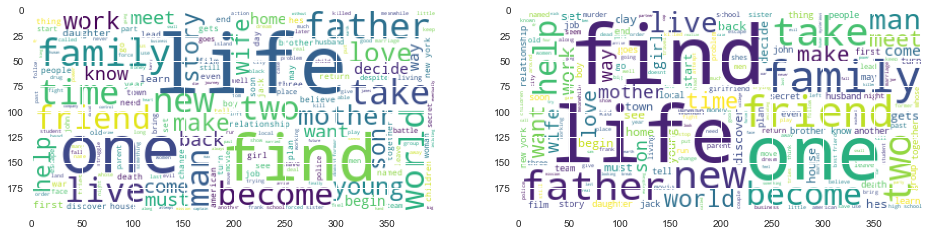

<IPython.core.display.Javascript object>

In [54]:
word_cloud0 = WordCloud(background_color="white", max_font_size=80).generate(
    " ".join(corpus0)
)
word_cloud1 = WordCloud(background_color="white", max_font_size=80).generate(
    " ".join(corpus1)
)

plt.figure(1, figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.imshow(word_cloud1)
plt.subplot(1, 2, 2)
plt.imshow(word_cloud0)

plt.savefig("../../image_highlights/oscar_nomination_model/word_cloud.png")
plt.show()